In [2]:
# imports
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pickle
import json

In [3]:
def load_image(img_path):
    return cv2.imread(img_path)


In [20]:
# load camera calibration data from pickle file
with open('camera_calibration_data.pkl', 'rb') as f:
    camera_calibration_data = pickle.load(f)
print(f"'camera_calibration_data' loaded from pickle file")

'camera_calibration_data' loaded from pickle file


# Preprocessing

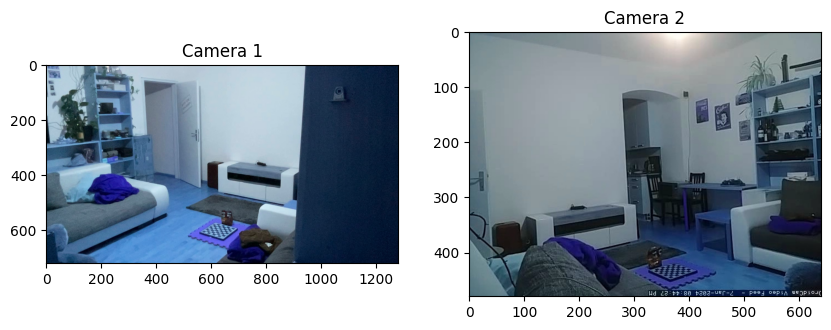

In [4]:
cam1_image = load_image('./cam1_chess_floor.jpg')
cam2_image = load_image('./cam2_chess_floor.jpg')

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cam1_image)
plt.title('Camera 1')

plt.subplot(1, 2, 2)
plt.imshow(cam2_image)
plt.title('Camera 2')
plt.show()

In [8]:
# Function to select ROI and zoom
def select_and_zoom(image):
    # Use OpenCV to select the ROI
    r = cv2.selectROI(image)

    # Crop image
    roi = image[int(r[1]):int(r[1]+r[3]), int(r[0]):int(r[0]+r[2])]

    
    # You may want to upsample the ROI for a closer look
    roi_zoomed = cv2.resize(roi, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    
    return roi_zoomed, r

### Cam1

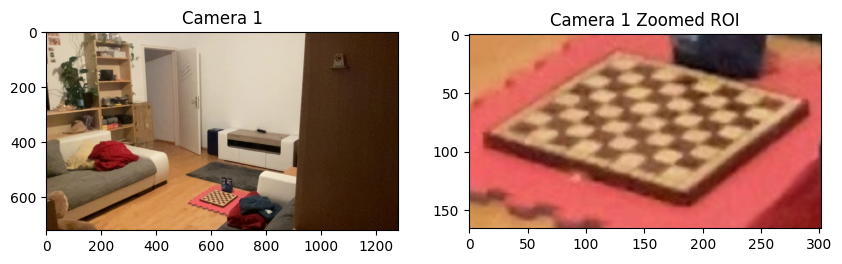

In [9]:
cam1_image_zoomed, cam1_image_zoomed_offsets = select_and_zoom(cam1_image)

# Display the zoomed ROIs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cam1_image, cv2.COLOR_BGR2RGB))
plt.title('Camera 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cam1_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Camera 1 Zoomed ROI')
plt.show()

### Cam2

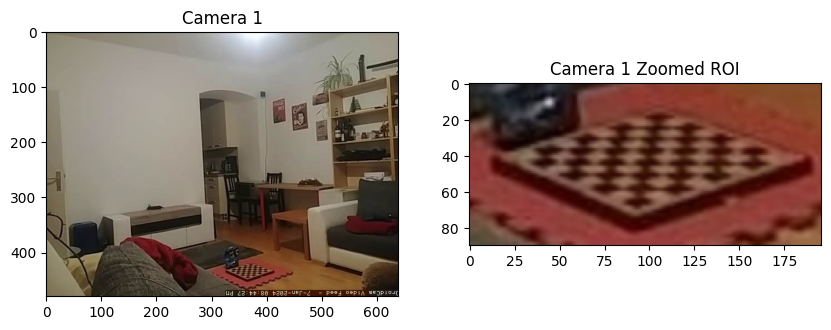

In [59]:
cam2_image_zoomed, cam2_image_zoomed_offsets = select_and_zoom(cam2_image)

# Display the zoomed ROIs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cam2_image, cv2.COLOR_BGR2RGB))
plt.title('Camera 1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cam2_image_zoomed, cv2.COLOR_BGR2RGB))
plt.title('Camera 1 Zoomed ROI')
plt.show()

# Corner Selection

In [31]:
import cv2
import numpy as np

# Function to manually select corner points
def select_corners(image, scale_factor=1):
    # Resize the image for easier point selection
    display_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LINEAR)
    
    # Create a copy of the image for displaying the points
    image_copy = display_image.copy()
    
    # Initialize a list to store the coordinates of the corners
    corners = []

    def mouse_callback(event, x, y, flags, param):
        # Left button click event
        if event == cv2.EVENT_LBUTTONDOWN:
            # Adjust the coordinates based on the scale factor
            original_x, original_y = int(x / scale_factor), int(y / scale_factor)
            # Store the coordinates of the click
            corners.append((original_x, original_y))
            # Draw a small circle at the location of the click on the display image
            cv2.circle(image_copy, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow('Select Corners', image_copy)
    
    # Show the image and set the mouse callback function
    cv2.imshow('Select Corners', image_copy)
    cv2.setMouseCallback('Select Corners', mouse_callback)
    
    # Wait until 'q' is pressed
    print("Click on each corner of the chessboard. Press 'q' when done.")
    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == ord('q') or len(corners) == 4:
            break
    
    # Close the image window
    cv2.destroyAllWindows()
    return corners



### Cam1

In [32]:
# Manually select the corner points on each image
corners_cam1 = select_corners(cam1_image_zoomed, scale_factor=800 / np.max(cam1_image_zoomed.shape))
# Now you have the corner points selected for each camera's ROI
print("Camera 1 Corners:", corners_cam1)

Click on each corner of the chessboard. Press 'q' when done.
Camera 1 Corners: [(127, 15), (283, 57), (186, 132), (19, 82)]


Camera 1 Corners: [(613, 573), (691, 594), (643, 632), (559, 607)]


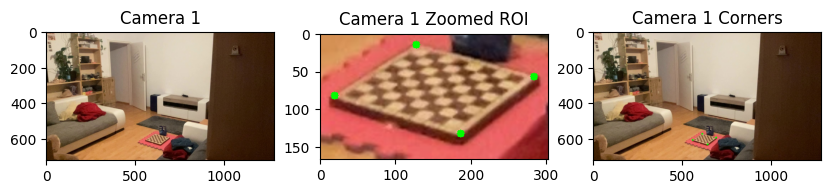

In [63]:
new_corners_cam1 = []
for corner in corners_cam1:
    new_corner = (int(corner[0]/2) + cam1_image_zoomed_offsets[0], int(corner[1]/2) + cam1_image_zoomed_offsets[1])
    new_corners_cam1.append(new_corner)

print("Camera 1 Corners:", new_corners_cam1)

# Function to draw the selected corners on the image
def draw_corners(image, corners):
    image_copy = image.copy()
    for corner in corners:
        cv2.circle(image_copy, corner, 5, (0, 255, 0), -1)
    return image_copy

# Draw the corners on the images
cam1_image_corners = draw_corners(cam1_image, new_corners_cam1)
cam1_image_zoomed_corners = draw_corners(cam1_image_zoomed, corners_cam1)

# Display the images and the zoomed ROIs
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cam1_image, cv2.COLOR_BGR2RGB))
plt.title('Camera 1')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cam1_image_zoomed_corners, cv2.COLOR_BGR2RGB))
plt.title('Camera 1 Zoomed ROI')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cam1_image_corners, cv2.COLOR_BGR2RGB))
plt.title('Camera 1 Corners')
plt.show()

### Cam2

In [60]:
# Manually select the corner points on each image
corners_cam2 = select_corners(cam2_image_zoomed, scale_factor=800 / np.max(cam2_image_zoomed.shape))
# Now you have the corner points selected for each camera's ROI
print("Camera 2 Corners:", corners_cam2)

Click on each corner of the chessboard. Press 'q' when done.
Camera 2 Corners: [(17, 40), (105, 14), (184, 41), (92, 73)]


Camera 1 Corners: [(327, 433), (371, 420), (411, 433), (365, 449)]


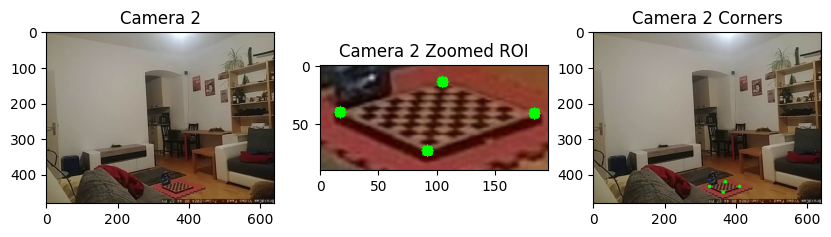

In [64]:
new_corners_cam2 = []
for corner in corners_cam2:
    new_corner = (int(corner[0]/2) + cam2_image_zoomed_offsets[0], int(corner[1]/2) + cam2_image_zoomed_offsets[1])
    new_corners_cam2.append(new_corner)

print("Camera 1 Corners:", new_corners_cam2)

# Function to draw the selected corners on the image
def draw_corners(image, corners):
    image_copy = image.copy()
    for corner in corners:
        cv2.circle(image_copy, corner, 5, (0, 255, 0), -1)
    return image_copy

# Draw the corners on the images
cam2_image_corners = draw_corners(cam2_image, new_corners_cam2)
cam2_image_zoomed_corners = draw_corners(cam2_image_zoomed, corners_cam2)

# Display the images and the zoomed ROIs
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(cam2_image, cv2.COLOR_BGR2RGB))
plt.title('Camera 2')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(cam2_image_zoomed_corners, cv2.COLOR_BGR2RGB))
plt.title('Camera 2 Zoomed ROI')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(cam2_image_corners, cv2.COLOR_BGR2RGB))
plt.title('Camera 2 Corners')
plt.show()

# Homography

In [39]:
# Function to compute the homography matrix from points on a chessboard
def compute_homography(src_points, dst_points):
    # Calculate the homography matrix
    homography_matrix, _ = cv2.findHomography(src_points, dst_points)
    return homography_matrix

In [40]:
# Convert list of tuples to numpy array
corners_cam1_list = np.array(new_corners_cam1, dtype="float32")

# Now you can calculate side_length
side_length = max(corners_cam1_list[:, 0]) - min(corners_cam1_list[:, 0])

# Define the destination points
dst_points = np.array([
    [0, 0],
    [side_length, 0],
    [side_length, side_length],
    [0, side_length]
], dtype="float32")

# Compute the homography matrix for each camera
homography_cam1 = compute_homography(corners_cam1_list, dst_points)
# Print out the homography matrices
print("Homography Matrix Camera 1:", homography_cam1)



Homography Matrix Camera 1: [[-2.50777249e+00 -3.98293278e+00  3.81948502e+03]
 [ 1.64016878e+00 -6.09205545e+00  2.48532431e+03]
 [ 3.83661069e-04 -5.69128578e-03  1.00000000e+00]]


In [65]:
# Convert list of tuples to numpy array
corners_cam2_list = np.array(new_corners_cam2, dtype="float32")

# Now you can calculate side_length
side_length = max(corners_cam2_list[:, 0]) - min(corners_cam2_list[:, 0])

# Define the destination points
dst_points = np.array([
    [0, 0],
    [side_length, 0],
    [side_length, side_length],
    [0, side_length]
], dtype="float32")

# Compute the homography matrix for each camera
homography_cam2 = compute_homography(corners_cam2_list, dst_points)
# Print out the homography matrices
print("Homography Matrix Camera 1:", homography_cam2)

Homography Matrix Camera 1: [[-4.41721484e-01  1.04908852e+00 -3.09812406e+02]
 [-4.41721484e-01 -1.49505733e+00  7.91802749e+02]
 [-1.69905948e-04 -3.16833750e-03  1.00000000e+00]]


# warp IMage

In [41]:
# Function to apply a homography matrix to an image
def warp_image(image, homography_matrix, width, height):
    # Warp the image using the homography matrix
    warped_image = cv2.warpPerspective(image, homography_matrix, (width, height))
    return warped_image

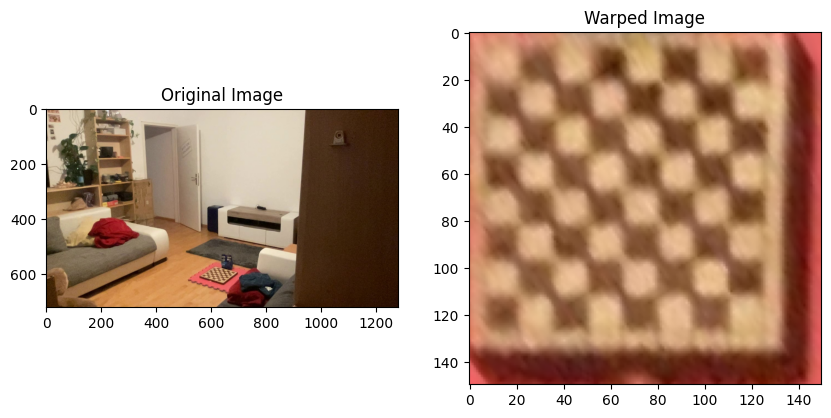

In [46]:
# Define the width and height of the destination image
height, width = cam1_image.shape[0:2]  # Example values, you can adjust these as needed

# Assume homography_cam1 is the correct homography matrix you have computed
# Apply the homography to the original image to get the warped image
warped_image_cam1 = warp_image(cam1_image, homography_cam1, width, height)


# Display the original and the warped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cam1_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped_image_cam1[:150, :150], cv2.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.show()

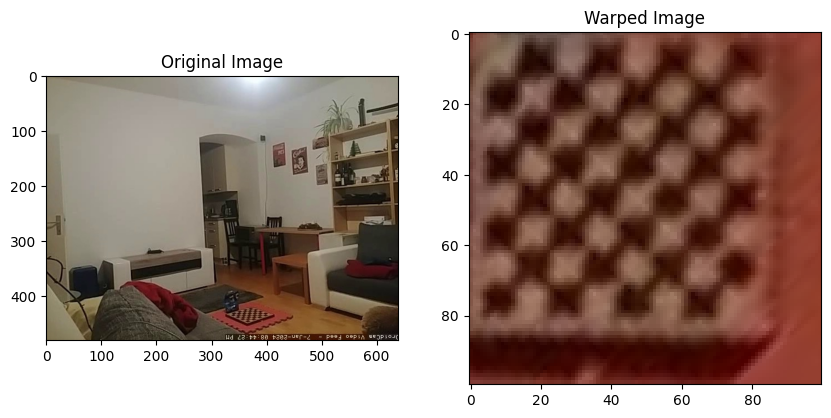

In [67]:
# Define the width and height of the destination image
height, width = cam2_image.shape[0:2]  # Example values, you can adjust these as needed

# Assume homography_cam1 is the correct homography matrix you have computed
# Apply the homography to the original image to get the warped image
warped_image_cam2 = warp_image(cam2_image, homography_cam2, width, height)


# Display the original and the warped images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cam2_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(warped_image_cam2[:100, :100], cv2.COLOR_BGR2RGB))
plt.title('Warped Image')
plt.show()

# 3D Reconstruction

In [68]:
def get_camera_position(image_points, world_points, camera_calibration_data):
    camera_matrix = camera_calibration_data["camera_matrix"]
    dist_coeffs = camera_calibration_data["distortion_coefficients"]

    # Solve PnP to get rotation and translation vectors
    _, rvec, tvec = cv2.solvePnP(world_points, image_points, camera_matrix, dist_coeffs)

    # Convert rotation vector to rotation matrix
    R, _ = cv2.Rodrigues(rvec)

    # Invert the transformation to get the camera's position in world coordinates
    camera_position = -np.matrix(R).T * np.matrix(tvec)

    return camera_position, R


In [72]:
world_points = np.array([
    [0, 0, 0],  # Bottom-left corner
    [0.2, 0, 0],  # Bottom-right corner (20cm from the bottom-left corner)
    [0.2, 0.2, 0],  # Top-right corner (20cm up from the bottom-right corner)
    [0, 0.2, 0]  # Top-left corner (20cm up from the bottom-left corner)
], dtype="float32")

In [71]:
image_points_cam1 = np.array(corners_cam1, dtype="float32")
cam1_positoion, cam1_rotation = get_camera_position(image_points_cam1, world_points, camera_calibration_data["camera1"])
print(f"Camera 1 Position in World Coordinates:\n{cam1_positoion}")
print(f"Camera 1 Rotation Matrix:\n{cam1_rotation}")


Camera 1 Position in World Coordinates:
[[ 0.73737154]
 [ 3.53444516]
 [-1.632539  ]]
Camera 1 Rotation Matrix:
[[ 0.83239743 -0.29538835 -0.46889257]
 [ 0.55292771  0.38585301  0.73850417]
 [-0.03722192 -0.87399266  0.48451146]]


In [74]:
image_points_cam2 = np.array(corners_cam2, dtype="float32")
cam2_positoion, cam2_rotation = get_camera_position(image_points_cam2, world_points, camera_calibration_data["camera1"])
print(f"Camera 2 Position in World Coordinates:\n{cam2_positoion}")
print(f"Camera 2 Rotation Matrix:\n{cam2_rotation}")


Camera 2 Position in World Coordinates:
[[-0.43212552]
 [ 0.19804308]
 [-0.00197774]]
Camera 2 Rotation Matrix:
[[ 0.13170557  0.5356394  -0.83411275]
 [ 0.19708477  0.81049557  0.55159272]
 [ 0.97149948 -0.23703875  0.00118042]]


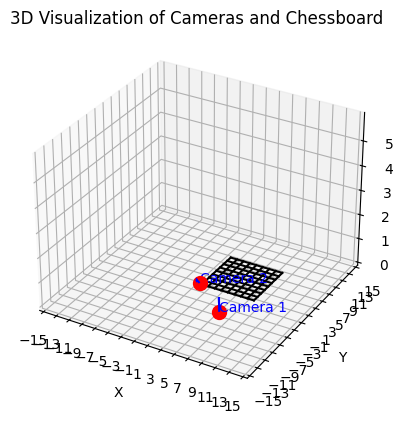

In [76]:
def plot_cameras_and_chessboard(camera_positions, camera_orientations, camera_labels, chessboard_size=(8, 8)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the chessboard as a grid
    for i in range(chessboard_size[0] + 1):
        ax.plot([i, i], [0, chessboard_size[1]], 'k-')
    for i in range(chessboard_size[1] + 1):
        ax.plot([0, chessboard_size[0]], [i, i], 'k-')

    # Plot each camera position, orientation, and label
    for pos, ori, label in zip(camera_positions, camera_orientations, camera_labels):
        cam_pos = np.array(pos).flatten()
        ax.scatter([cam_pos[0]], [cam_pos[1]], [cam_pos[2]], color='r', s=100)
        ax.text(cam_pos[0], cam_pos[1], cam_pos[2], f'Camera {label}', color='blue')

        # Draw lines indicating the camera's viewing direction
        look_dir = ori[:, 2]  # Assuming the third column is the direction the camera is facing
        ax.quiver(cam_pos[0], cam_pos[1], cam_pos[2], look_dir[0], look_dir[1], look_dir[2], length=1.0, color='b')

    lim = 15
    # Set the limits and labels for all axes
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    ax.set_zlim(0, 6)
    ax.set_xticks(range(-lim, lim+1, 2))
    ax.set_yticks(range(-lim, lim+1, 2))
    ax.set_zticks(range(0, 6, 1))
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title('3D Visualization of Cameras and Chessboard')
    plt.show()


plot_cameras_and_chessboard(
    [cam1_positoion, cam2_positoion], 
    [cam1_rotation, cam2_rotation],
    ['1', '2']
    )


## Extrinsic Matrix

In [83]:

# Function to compute the extrinsic matrix
def compute_extrinsic_matrix(homography_matrix, camera_matrix):
    # Compute the rotation and translation vectors using cv2.decomposeHomographyMat
    _, rotation_vector, translation_vector, _, _ = cv2.decomposeHomographyMat(homography_matrix, camera_matrix)

    # Compute the extrinsic matrix using cv2.Rodrigues
    _, rotation_matrix = cv2.Rodrigues(rotation_vector)
    extrinsic_matrix = np.hstack((rotation_matrix, translation_vector))
    return extrinsic_matrix

# Assume homography_cam1 and camera_matrix are the correct matrices you have computed
# Compute the extrinsic matrix for camera 1
extrinsic_cam1 = compute_extrinsic_matrix(homography_cam1, camera_calibration_data['camera1']['camera_matrix'])
# Print out the extrinsic matrix
print("Extrinsic Matrix Camera 1:\n", extrinsic_cam1)



ValueError: not enough values to unpack (expected 5, got 4)

In [78]:
homography_cam1

array([[-2.50777249e+00, -3.98293278e+00,  3.81948502e+03],
       [ 1.64016878e+00, -6.09205545e+00,  2.48532431e+03],
       [ 3.83661069e-04, -5.69128578e-03,  1.00000000e+00]])

## Projection Matrix

In [ ]:

# Function to compute the projection matrix
def compute_projection_matrix(extrinsic_matrix, camera_matrix):
    # Compute the projection matrix
    projection_matrix = np.dot(camera_matrix, extrinsic_matrix)
    return projection_matrix

# Assume extrinsic_cam1 and camera_matrix are the correct matrices you have computed
# Compute the projection matrix for camera 1
projection_cam1 = compute_projection_matrix(extrinsic_cam1, camera_calibration_data['camera1']['camera_matrix'])
# Print out the projection matrix
print("Projection Matrix Camera 1:\n", projection_cam1)



## World Coordinates

In [ ]:
# Function to compute the world coordinates of the chessboard corners
def compute_world_coordinates(image_points, homography_matrix, camera_matrix):
    # Compute the extrinsic matrix
    extrinsic_matrix = compute_extrinsic_matrix(homography_matrix, camera_matrix)
    
    # Compute the projection matrix
    projection_matrix = compute_projection_matrix(extrinsic_matrix, camera_matrix)
    
    # Compute the world coordinates using cv2.convertPointsToHomogeneous
    image_points_homogeneous = cv2.convertPointsToHomogeneous(image_points)
    world_coordinates = cv2.perspectiveTransform(image_points_homogeneous, np.linalg.inv(projection_matrix))
    return world_coordinates

# Assume corners_cam1_list, homography_cam1, and camera_matrix are the correct matrices you have computed
# Compute the world coordinates of the chessboard corners for camera 1
world_coordinates_cam1 = compute_world_coordinates(corners_cam1_list, homography_cam1, camera_calibration_data['camera1']['camera_matrix'])
# Print out the world coordinates
print("World Coordinates Camera 1:\n", world_coordinates_cam1)


## Reprojection Error

In [51]:
# Function to compute the reprojection error
def compute_reprojection_error(image_points, world_points, homography_matrix, camera_matrix):
    # Compute the world coordinates
    world_coordinates = compute_world_coordinates(image_points, homography_matrix, camera_matrix)
    
    # Compute the reprojection error
    reprojection_error = np.sqrt(np.sum((world_points - world_coordinates) ** 2))
    return reprojection_error

# Assume corners_cam1_list, world_points, homography_cam1, and camera_matrix are the correct matrices you have computed
# Compute the reprojection error for camera 1
reprojection_error_cam1 = compute_reprojection_error(corners_cam1_list, world_points, homography_cam1, camera_calibration_data['camera1']['camera_matrix'])
# Print out the reprojection error
print("Reprojection Error Camera 1:", reprojection_error_cam1)

NameError: name 'compute_world_coordinates' is not defined